In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [16]:
DATA_PATH = '../data/training/final/travel_ml.csv'
VAL_DATA_PATH = '../data/validation/final/travel_ml.csv'
travel = pd.read_csv(DATA_PATH)
travel_val = pd.read_csv(VAL_DATA_PATH)
travel.head()

,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_MISSION_CHECK,activity_payment_sum,activity_payment_count,activity_store_count,activity_history_rows,...,visit_rcmdtn_avg_SCALED,visit_trip_days_SCALED,visit_move_cnt_SCALED,AGE_GRP_SCALED,FAMILY_MEMB_SCALED,INCOME_SCALED,HOUSE_INCOME_SCALED,TRAVEL_TERM_SCALED,TRAVEL_NUM_SCALED,TRAVEL_COMPANIONS_NUM_SCALED
0,a_a014262,1;11;2;22;,2022-10-29,2022-10-30,자가용,2;1;22,183249,6,6,5,...,-2.456701,-0.502420,-0.661655,0.813287,0.223137,1.469152,0.710455,-2.330665,-0.324080,-0.221847
1,a_a006728,21;24;5;22;26;27;,2022-10-10,2022-10-11,자가용,6;1;22,68600,3,3,10,...,-0.305714,-0.502420,-0.661655,0.813287,1.006803,2.469497,1.160263,-0.732951,-0.779918,1.116318
2,a_a015745,1;2;6;,2022-10-31,2022-11-03,대중교통 등,13;3;28,57100,7,6,22,...,0.726760,1.984338,2.441881,2.602554,0.223137,0.468807,-1.088777,0.864763,1.499272,-0.890930
3,a_a010544,21;22;24;26;,2022-11-01,2022-11-02,자가용,1;22;26,89700,5,4,10,...,-0.797368,-0.502420,0.225070,0.813287,-1.344195,0.468807,-0.189161,-0.732951,0.587596,-0.890930
4,a_a012058,1;4;10;12;21;22;26;,2022-11-05,2022-11-06,대중교통 등,1;21;22,155520,4,4,8,...,-1.166109,-1.745799,-0.661655,-0.081346,-0.560529,-0.531537,-0.638969,-0.732951,-0.324080,-0.221847


In [ ]:
# 학습에 사용할 피처값 선언
BINARY_CLASSIFICATION_TARGET = 'IS_FAILED_TRIP'

BINARY_CLASSIFICATION_FEATURES = [
    'TRAVEL_STATUS_ACCOMPANY_CODE',
    'MVMN_NM_CODE',
    'GENDER_CODE',
    'TRAVEL_STATUS_RESIDENCE_CODE',
    'TRAVEL_STATUS_DESTINATION_CODE',
    'TRAVEL_PURPOSE_CD_1',
    'TRAVEL_PURPOSE_CD_2',
    'TRAVEL_PURPOSE_CD_3',
    'TRAVEL_PURPOSE_CD_4',
    'TRAVEL_PURPOSE_CD_5',
    'TRAVEL_PURPOSE_CD_6',
    'TRAVEL_PURPOSE_CD_7',
    'TRAVEL_PURPOSE_CD_8',
    'TRAVEL_PURPOSE_CD_9',
    'TRAVEL_PURPOSE_CD_10',
    'TRAVEL_PURPOSE_CD_11',
    'TRAVEL_PURPOSE_CD_12',
    'TRAVEL_PURPOSE_CD_13',
    'TRAVEL_PURPOSE_CD_21',
    'TRAVEL_PURPOSE_CD_22',
    'TRAVEL_PURPOSE_CD_23',
    'TRAVEL_PURPOSE_CD_24',
    'TRAVEL_PURPOSE_CD_25',
    'TRAVEL_PURPOSE_CD_26',
    'TRAVEL_PURPOSE_CD_27',
    'TRAVEL_PURPOSE_CD_28',
    'TRAVEL_MISSION_CHECK_CD_1',
    'TRAVEL_MISSION_CHECK_CD_2',
    'TRAVEL_MISSION_CHECK_CD_3',
    'TRAVEL_MISSION_CHECK_CD_4',
    'TRAVEL_MISSION_CHECK_CD_5',
    'TRAVEL_MISSION_CHECK_CD_6',
    'TRAVEL_MISSION_CHECK_CD_7',
    'TRAVEL_MISSION_CHECK_CD_8',
    'TRAVEL_MISSION_CHECK_CD_9',
    'TRAVEL_MISSION_CHECK_CD_10',
    'TRAVEL_MISSION_CHECK_CD_11',
    'TRAVEL_MISSION_CHECK_CD_12',
    'TRAVEL_MISSION_CHECK_CD_13',
    'TRAVEL_MISSION_CHECK_CD_21',
    'TRAVEL_MISSION_CHECK_CD_22',
    'TRAVEL_MISSION_CHECK_CD_23',
    'TRAVEL_MISSION_CHECK_CD_24',
    'TRAVEL_MISSION_CHECK_CD_25',
    'TRAVEL_MISSION_CHECK_CD_26',
    'TRAVEL_MISSION_CHECK_CD_27',
    'TRAVEL_MISSION_CHECK_CD_28',
    'TRAVEL_START_YEAR',
    'TRAVEL_START_MONTH',
    'TRAVEL_END_YEAR',
    'TRAVEL_END_MONTH',
    'activity_payment_sum_SCALED',
    'activity_payment_count_SCALED',
    'activity_store_count_SCALED',
    'activity_history_rows_SCALED',
    'activity_type_unique_SCALED',
    'lodging_payment_sum_SCALED',
    'lodging_payment_count_SCALED',
    'lodging_store_count_SCALED',
    'visit_trip_days_SCALED',
    'visit_move_cnt_SCALED',
    'AGE_GRP_SCALED',
    'FAMILY_MEMB_SCALED',
    'INCOME_SCALED',
    'HOUSE_INCOME_SCALED',
    'TRAVEL_TERM_SCALED',
    'TRAVEL_NUM_SCALED',
    'TRAVEL_COMPANIONS_NUM_SCALED'
]

In [18]:
# 데이터 선언
X = travel[BINARY_CLASSIFICATION_FEATURES]
y = travel[BINARY_CLASSIFICATION_TARGET]

In [19]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.3
)

In [20]:
# 레이블에서 0, 1의 비율 계산
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# 모델 호출
xgb_clf = XGBClassifier(
    n_estimators=100,       # 결정트리 기반 모델에만 가능
    max_depth=3,
    learning_rate=5e-6,
    random_state=42,
    scale_pos_weight=ratio
)

In [ ]:
# 학습
xgb_clf.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [22]:
# 예측
y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

In [23]:
# 평가
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
# accuracy score, MSE, R2 score
print("="*5+"Train data"+"="*70)
print(f'Acc : {accuracy_score(y_true=y_train, y_pred=y_pred_train)}')
print(f'MSE : {mean_squared_error(y_true=y_train, y_pred=y_pred_train)}')
print(f'R2 : {r2_score(y_true=y_train, y_pred=y_pred_train)}')
print("="*5+"Confusion Matrix"+"="*63)
print(confusion_matrix(y_true=y_train, y_pred=y_pred_train))
print("="*5+"Classification_report"+"="*58)
print(classification_report(y_true=y_train, y_pred=y_pred_train))
print("="*5+"Test data"+"="*70)
print(f'Acc : {accuracy_score(y_true=y_test, y_pred=y_pred_test)}')
print(f'MSE : {mean_squared_error(y_true=y_test, y_pred=y_pred_test)}')
print(f'R2 : {r2_score(y_true=y_test, y_pred=y_pred_test)}')
print("="*5+"Confusion Matrix"+"="*63)
print(confusion_matrix(y_true=y_test, y_pred=y_pred_test))
print("="*5+"Classification_report"+"="*58)
print(classification_report(y_true=y_test, y_pred=y_pred_test))

=====Train data======================================================================
Acc : 0.5991041433370661
MSE : 0.4008958566629339
R2 : -0.9413846592360395
=====Confusion Matrix===============================================================
[[1606  925]
 [ 507  534]]
=====Classification_report==========================================================
              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69      2531
         1.0       0.37      0.51      0.43      1041

    accuracy                           0.60      3572
   macro avg       0.56      0.57      0.56      3572
weighted avg       0.65      0.60      0.61      3572

=====Test data======================================================================
Acc : 0.5636838667537557
MSE : 0.4363161332462443
R2 : -1.14810396178938
=====Confusion Matrix===============================================================
[[687 410]
 [258 176]]
=====Classification_report=======================

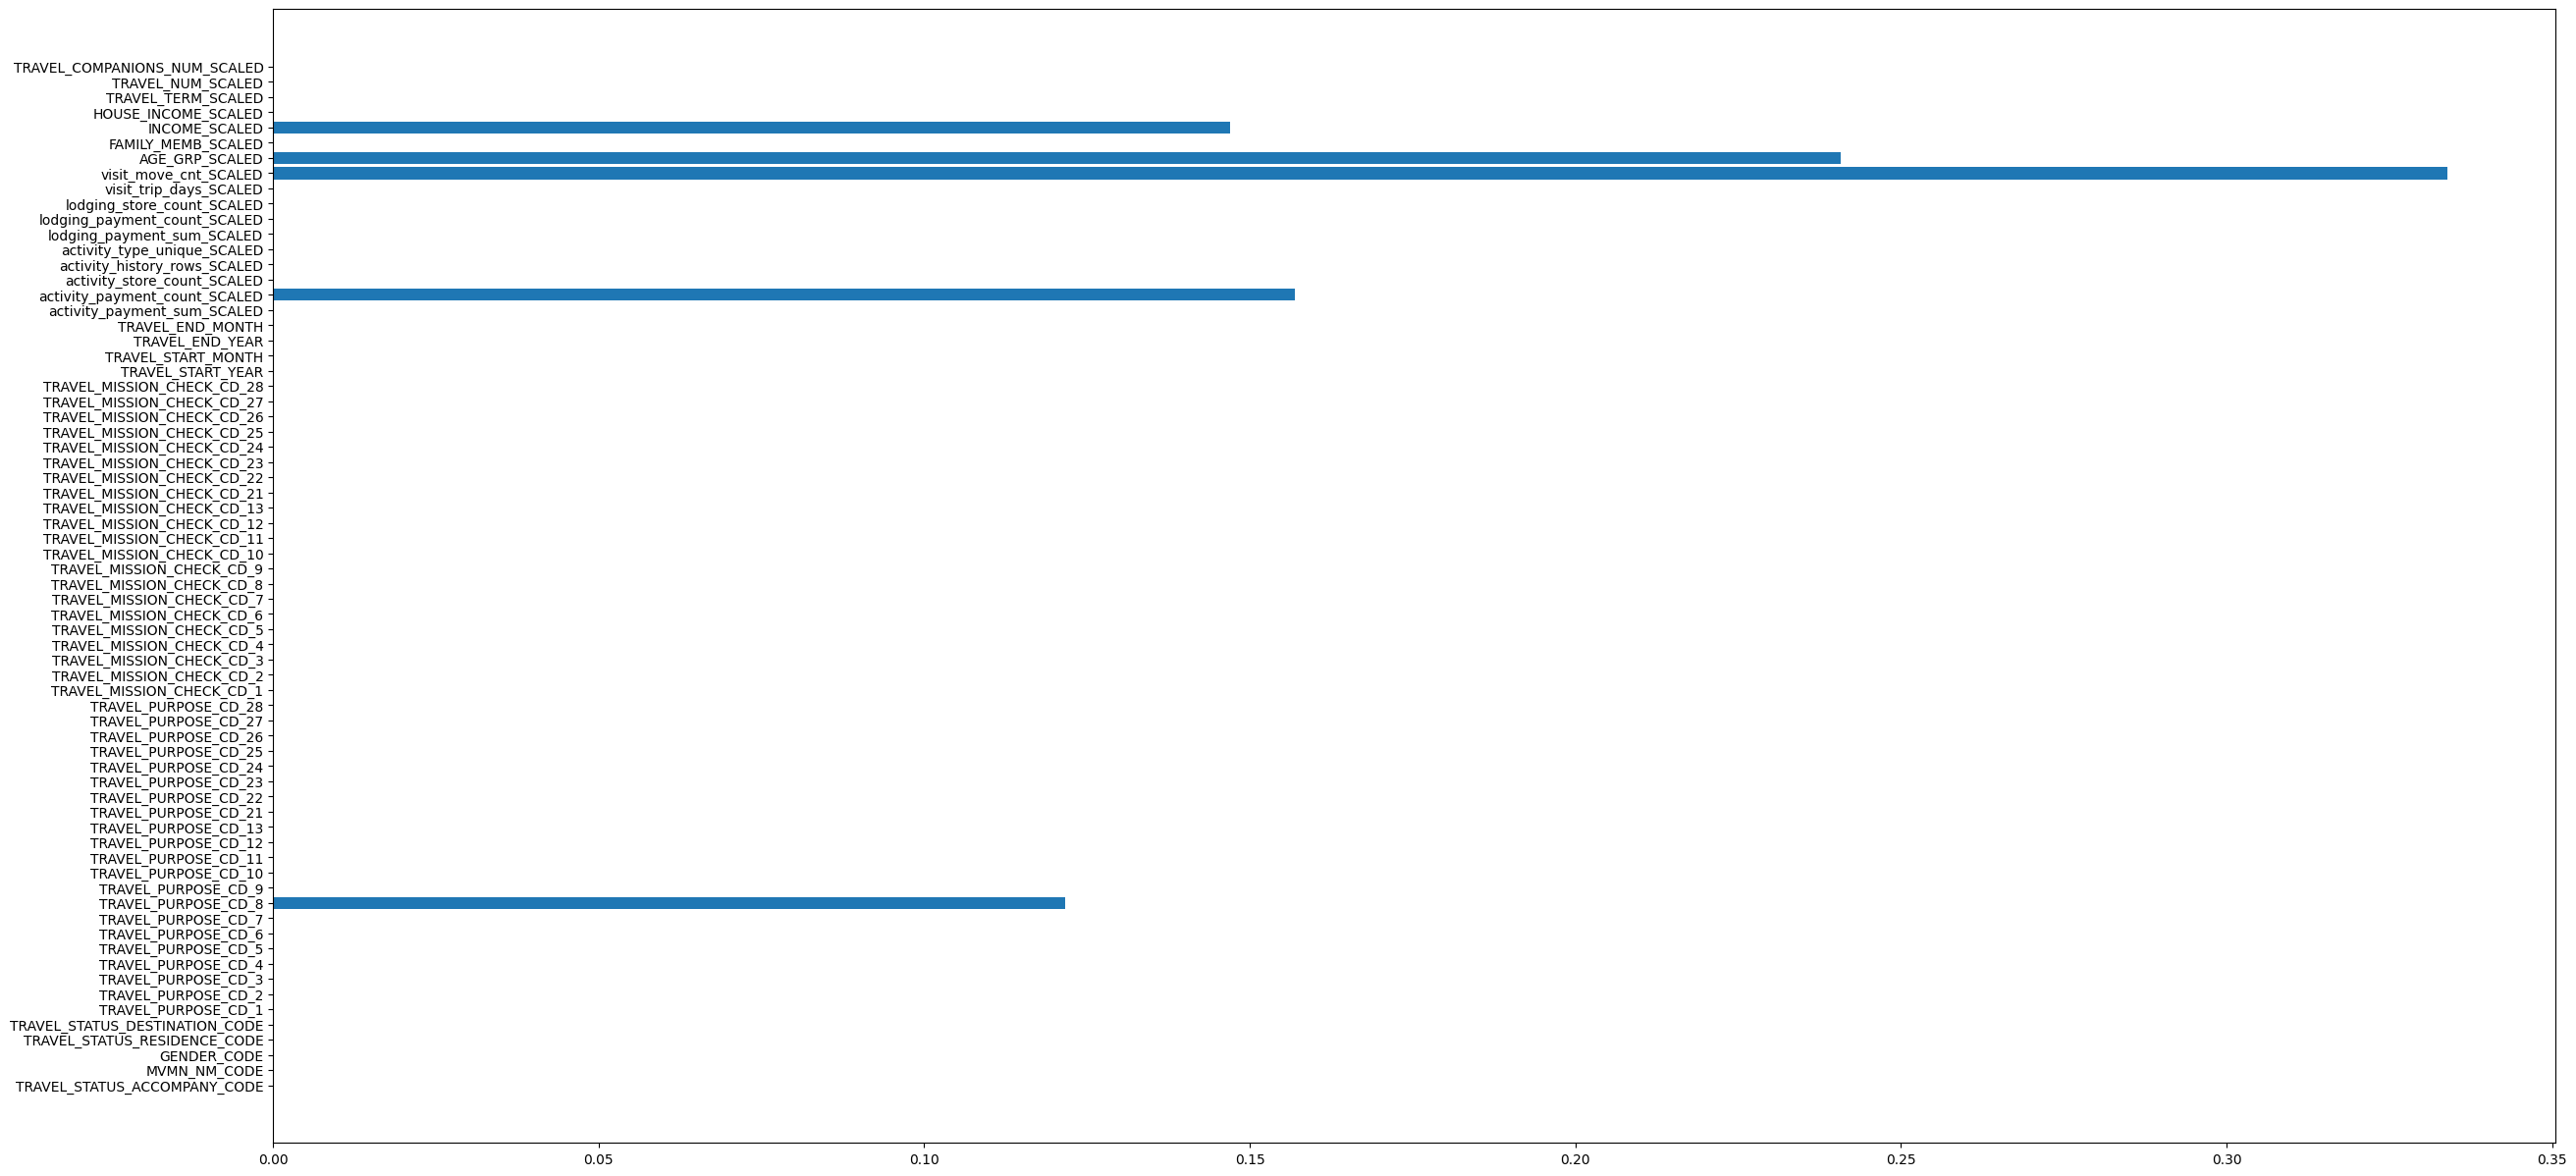

In [24]:
import matplotlib.pyplot as plt

# 피처 중요도 시각화
plt.figure(figsize=(30,15))
plt.barh(X.columns, xgb_clf.feature_importances_)
plt.show()

In [25]:
# RandomizedSearchCV for XGBoost
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import average_precision_score, roc_auc_score
from xgboost import XGBClassifier

# 클래스 불균형 비율(양성:실패) 보정
pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

base_xgb = XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=pos_weight
)

param_distributions = {
    'n_estimators': [300, 600, 1000, 1500, 2000],
    'learning_rate': [0.3, 0.2, 0.1, 0.05, 0.03, 0.02, 0.01],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 5, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0.0, 0.1, 0.2, 0.3, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rand_search = RandomizedSearchCV(
    estimator=base_xgb,
    param_distributions=param_distributions,
    n_iter=40,
    scoring='average_precision',
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42,
    refit=True
)
rand_search.fit(X_train, y_train)
print('Best params:', rand_search.best_params_)
print('Best CV PR-AUC:', rand_search.best_score_)
best_model = rand_search.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'subsample': 0.6, 'reg_lambda': 1.0, 'reg_alpha': 0.0, 'n_estimators': 600, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.03, 'gamma': 0.0, 'colsample_bytree': 0.9}
Best CV PR-AUC: 0.34197143656035645


In [26]:
# 베스트 모델 평가 (Train/Test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_train_gs = best_model.predict(X_train)
y_pred_test_gs = best_model.predict(X_test)
y_proba_train_gs = best_model.predict_proba(X_train)[:,1]
y_proba_test_gs = best_model.predict_proba(X_test)[:,1]
print('='*5+'Train (BestModel)'+'='*70)
print(f"Acc : {accuracy_score(y_train, y_pred_train_gs):.4f}")
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_train_gs))
print(classification_report(y_train, y_pred_train_gs))
print(f"ROC-AUC : {roc_auc_score(y_train, y_proba_train_gs):.4f}")
print(f"PR-AUC  : {average_precision_score(y_train, y_proba_train_gs):.4f}")
print('='*5+'Test (BestModel)'+'='*70)
print(f"Acc : {accuracy_score(y_test, y_pred_test_gs):.4f}")
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_test_gs))
print(classification_report(y_test, y_pred_test_gs))
print(f"ROC-AUC : {roc_auc_score(y_test, y_proba_test_gs):.4f}")
print(f"PR-AUC  : {average_precision_score(y_test, y_proba_test_gs):.4f}")


=====Train (BestModel)======================================================================
Acc : 0.7578
Confusion Matrix
[[1879  652]
 [ 213  828]]
              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81      2531
         1.0       0.56      0.80      0.66      1041

    accuracy                           0.76      3572
   macro avg       0.73      0.77      0.73      3572
weighted avg       0.80      0.76      0.77      3572

ROC-AUC : 0.8518
PR-AUC  : 0.6937
=====Test (BestModel)======================================================================
Acc : 0.5787
Confusion Matrix
[[696 401]
 [244 190]]
              precision    recall  f1-score   support

         0.0       0.74      0.63      0.68      1097
         1.0       0.32      0.44      0.37       434

    accuracy                           0.58      1531
   macro avg       0.53      0.54      0.53      1531
weighted avg       0.62      0.58      0.59      1531

ROC-AUC : 0.5585


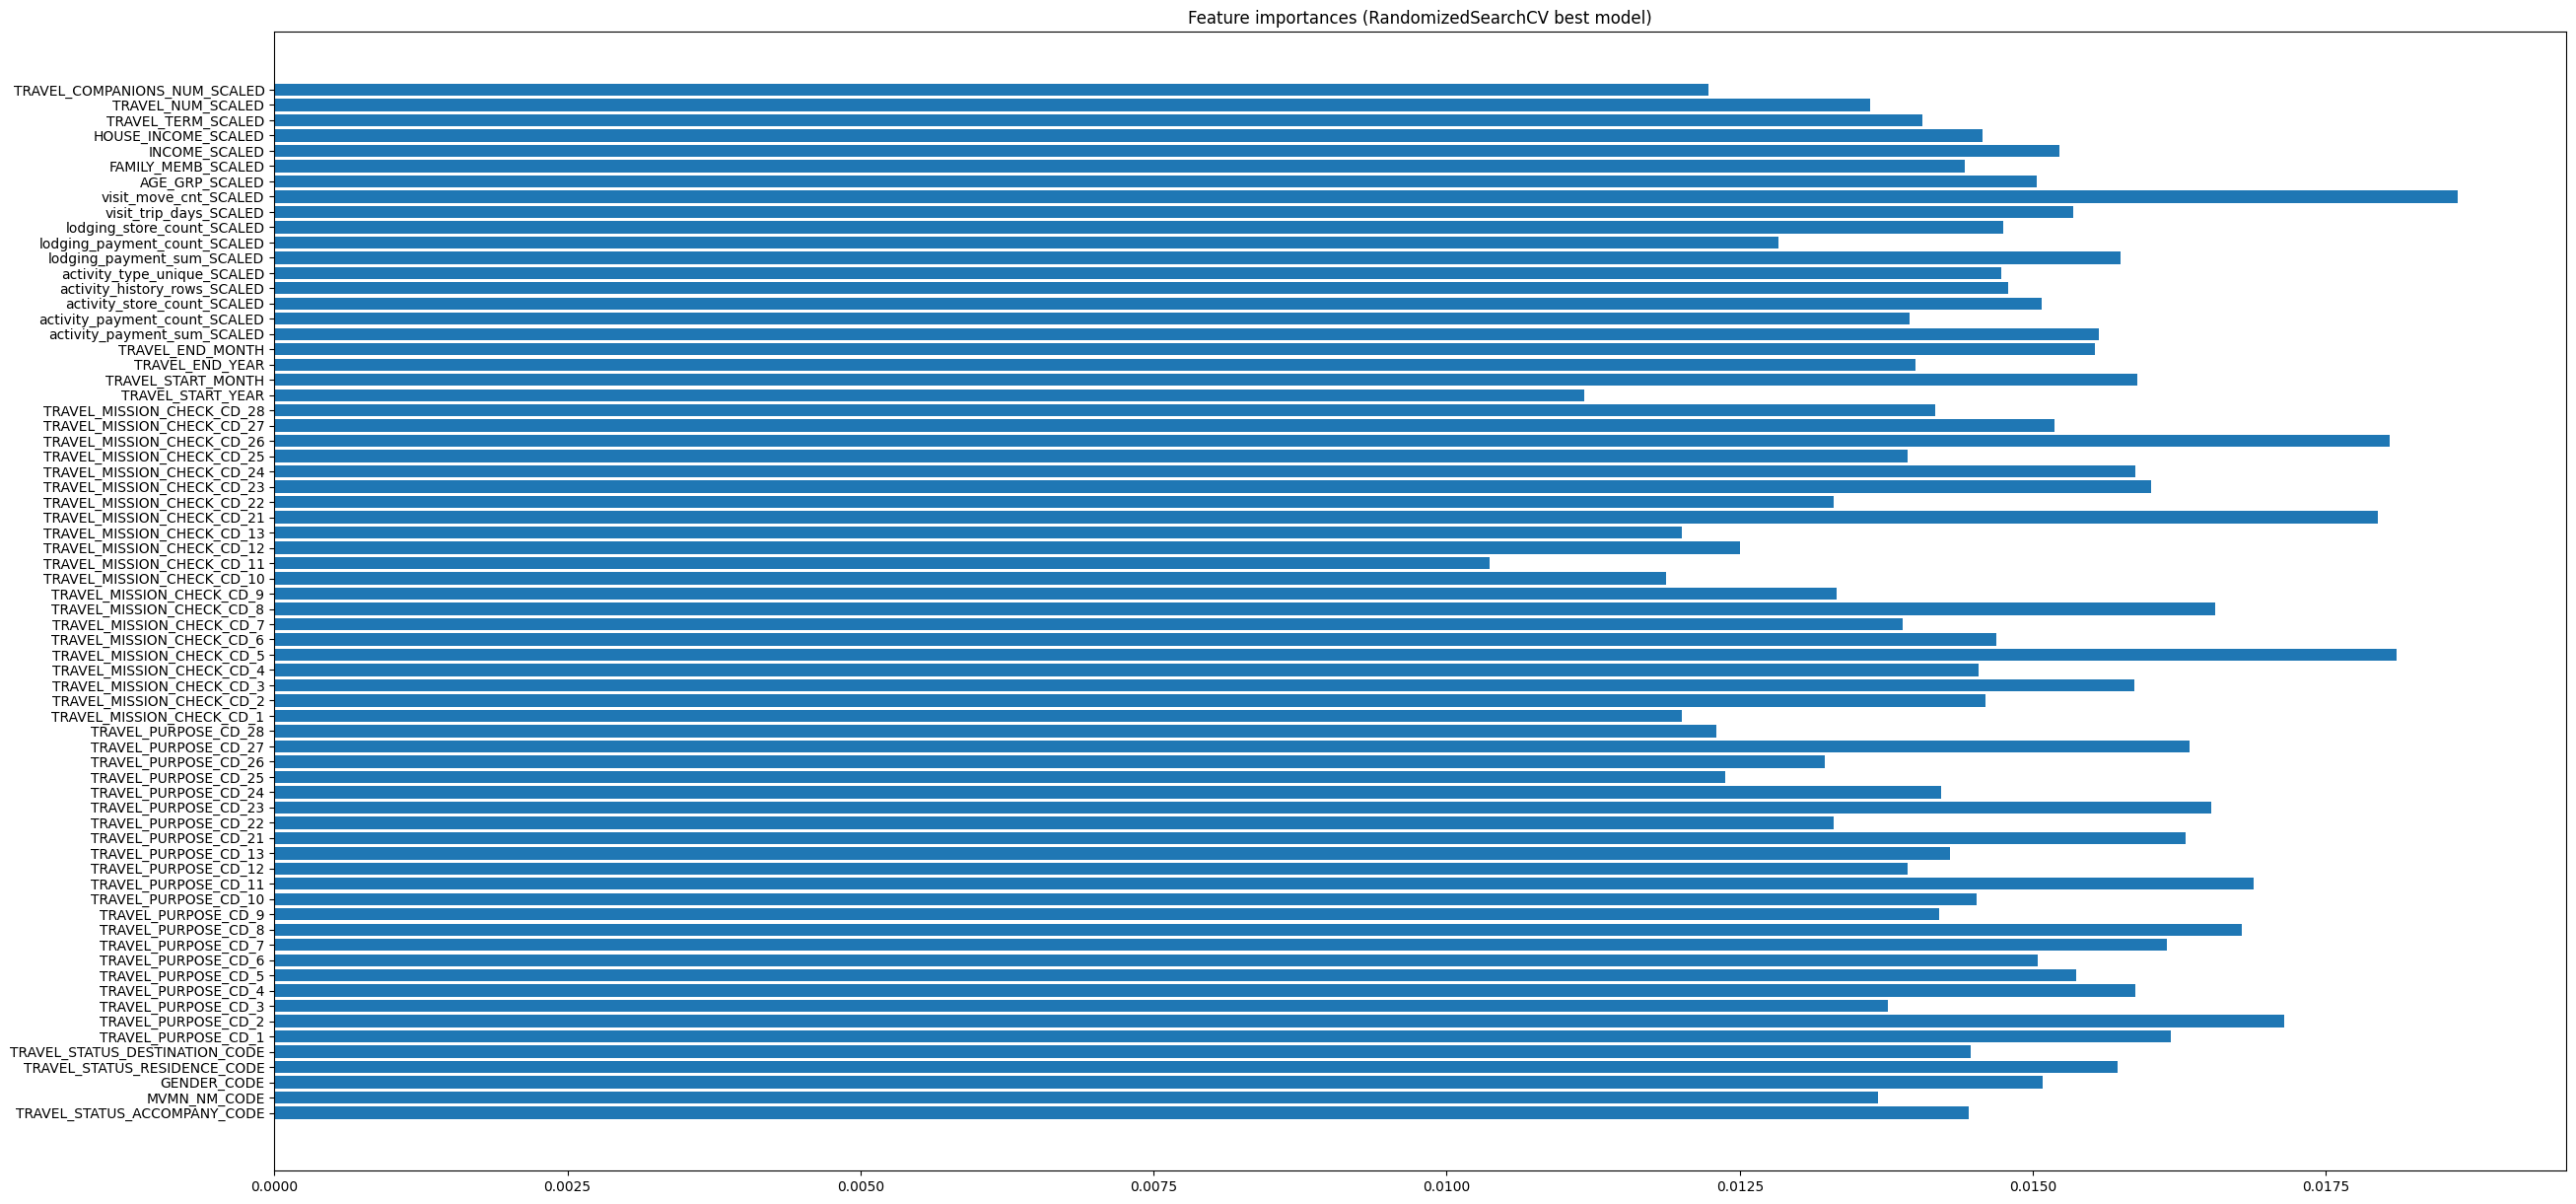

In [27]:
# 특성 중요도 (베스트 모델)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.barh(X.columns, best_model.feature_importances_)
plt.title('Feature importances (RandomizedSearchCV best model)')
plt.show()
